In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=2000, 
                  n_features=2, 
                  centers=5, 
                  cluster_std=1.8)

In [3]:
X

array([[-1.90660747, -6.35404399],
       [-5.4194781 ,  9.3140701 ],
       [-1.1749235 , -6.79214948],
       ...,
       [-1.92098698, -7.97695394],
       [-4.62476435, 10.67703025],
       [-0.25416533, 10.33896283]])

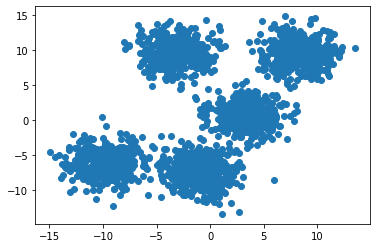

In [4]:
plt.scatter(X[:,0], X[:,1])

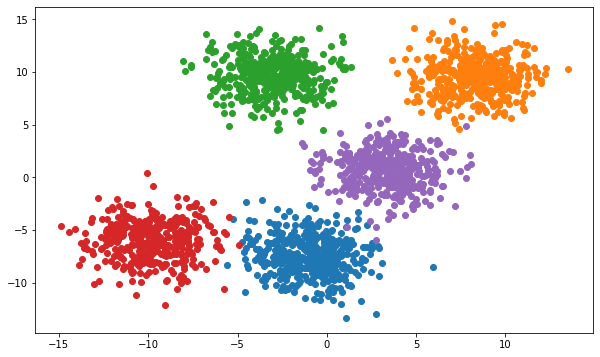

In [5]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
for i in np.unique(y):
  ax.scatter(X[:,0][y==i], X[:,1][y==i])

In [8]:
# seleccionar aleatoriamente k centroides
centroides = {}
k = 5
for i in range(k):
  centroides[i] = X[np.random.choice(len(X))]

centroides

{0: array([-1.28205751, -7.62366383]),
 1: array([9.27802705, 9.46946912]),
 2: array([8.20697941, 9.20258539]),
 3: array([ 3.98802681, -0.82425001]),
 4: array([-2.96555553, -4.46654162])}

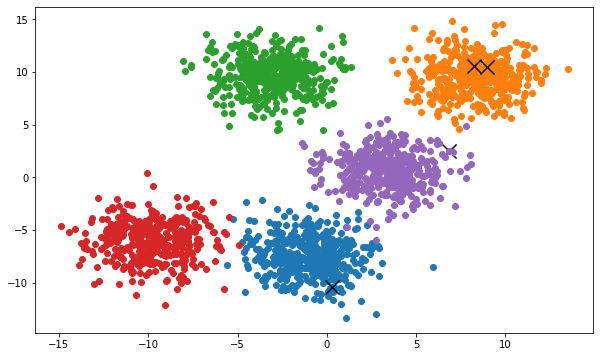

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
for i in np.unique(y):
  ax.scatter(centroides[i][0],centroides[i][1], marker='x', color='k', s=200)
  ax.scatter(X[:,0][y==i], X[:,1][y==i])
  

$$dist(\textbf{p},\textbf{q})=\sqrt{(q_1-p_1)^2+(q_0-p_0)^2}$$

In [9]:
#calcular la distancia del cluster a cada punto

def dista_euclidiana(puntos, centroide):
  return np.sqrt(sum((puntos-centroide)**2))

distancias = {}

for i in range(len(X)):
  distancias[i] = []

for pos, dato in enumerate(X):
  for pos_, centroide in centroides.items():
    distancias[pos].append(dista_euclidiana(dato, centroide))

In [10]:
#asignar cada dato a un cluster por la mìnima distancia

puntos_centroides = {}

for i in range(k):
  puntos_centroides[i] = []

for pos, dists in distancias.items():
  puntos_centroides[dists.index(min(dists))].append(X[pos])

In [11]:
x_0 = np.vstack(puntos_centroides[0])
x_1 = np.vstack(puntos_centroides[1])
x_2 = np.vstack(puntos_centroides[2])

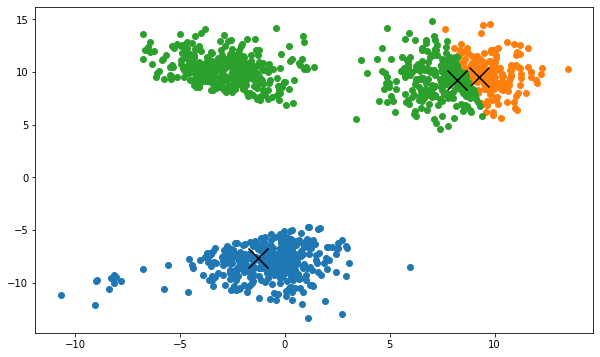

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.scatter(x_0[:,0],x_0[:,1])
ax.scatter(centroides[0][0],centroides[0][1], marker='x', s=400, color='k')
ax.scatter(x_1[:,0],x_1[:,1])
ax.scatter(centroides[1][0],centroides[1][1], marker='x', s=400, color='k')
ax.scatter(x_2[:,0],x_2[:,1])
ax.scatter(centroides[2][0],centroides[2][1], marker='x', s=400, color='k')

In [13]:
#nuevo centroide: promedio de los datos en cada centroide

for centroide, datos in puntos_centroides.items():
  centroides[centroide] = np.average(np.vstack(datos),axis=0)

In [14]:
centroides

{0: array([-0.9578366 , -8.08742745]),
 1: array([9.90119592, 9.87906123]),
 2: array([1.47710755, 9.78674869]),
 3: array([2.54581193, 1.41579132]),
 4: array([-8.54305246, -4.94383424])}

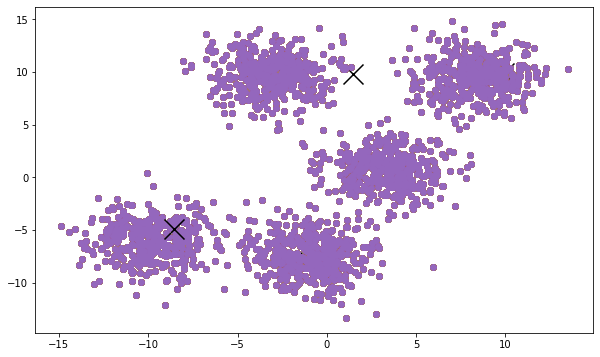

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
for centroide, datos in centroides.items():
  ax.scatter(X[:,0],X[:,1])
  ax.scatter(datos[0], datos[1], marker='x', s=400, color='k')

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()

y_digits = digits.target
X_digits = digits.data
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca',
            random_state=124)

X = tsne.fit_transform(X_digits)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [17]:
X

array([[ -1.1131928,  57.021072 ],
       [ 25.311811 , -19.836061 ],
       [ 17.292994 ,  -9.464723 ],
       ...,
       [  8.463196 , -13.714185 ],
       [-19.421669 ,  25.16468  ],
       [  4.9409285,  -9.680751 ]], dtype=float32)

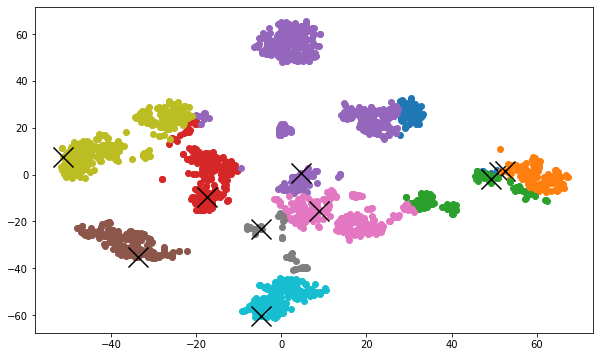

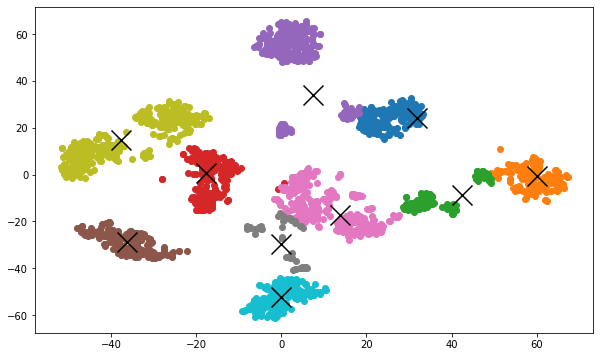

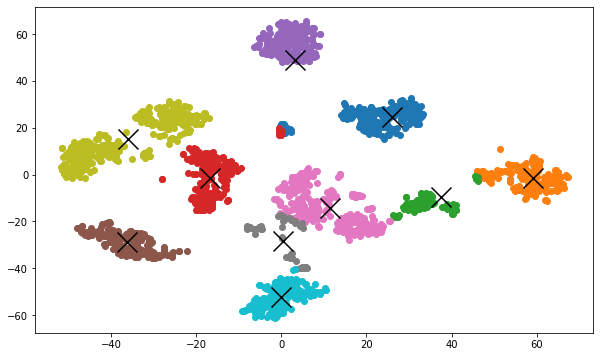

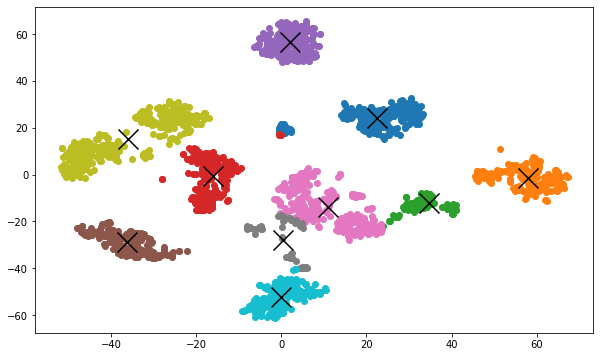

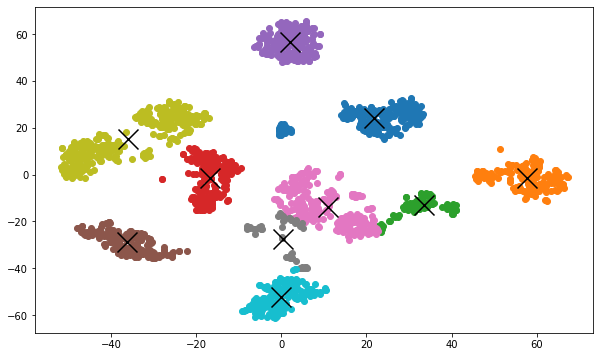

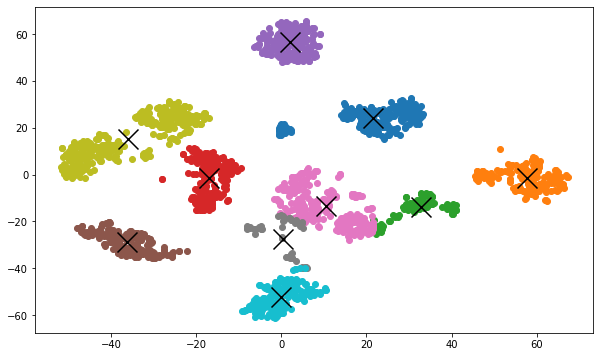

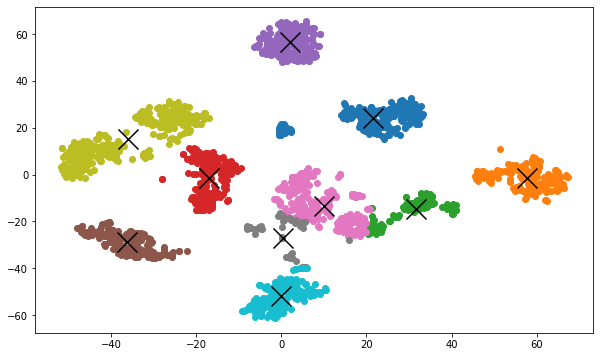

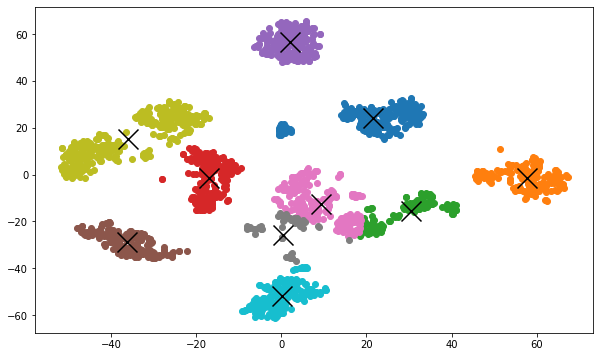

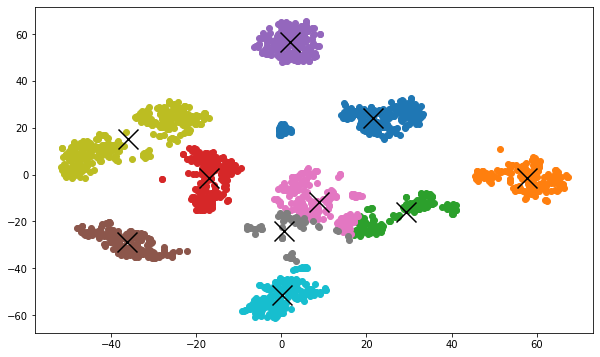

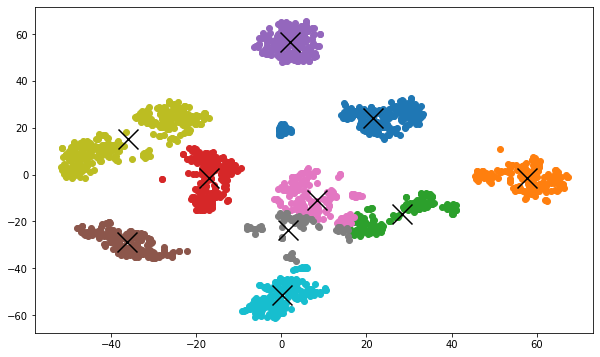

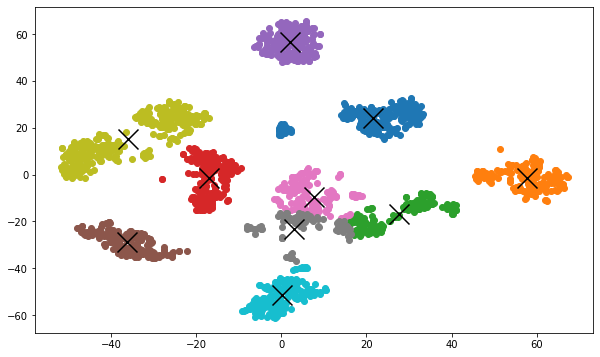

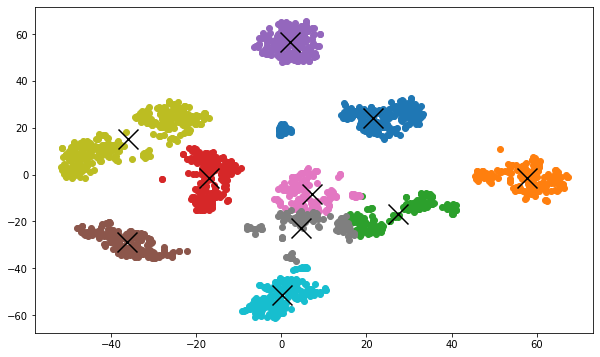

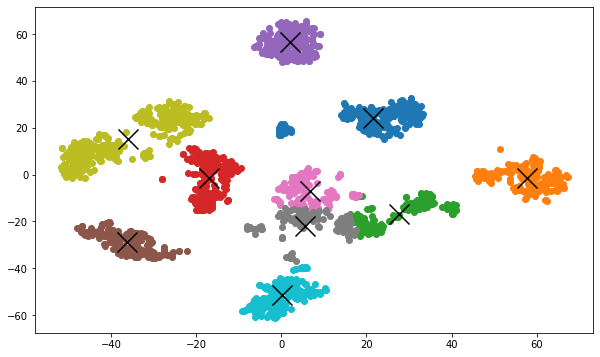

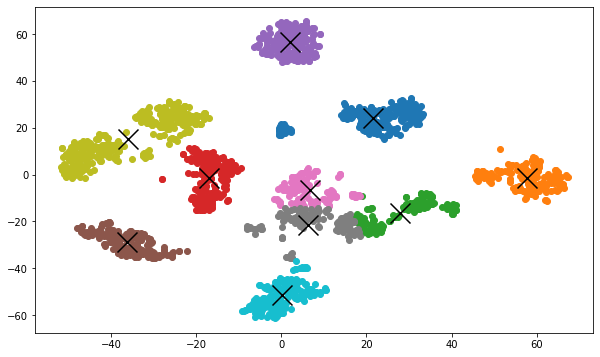

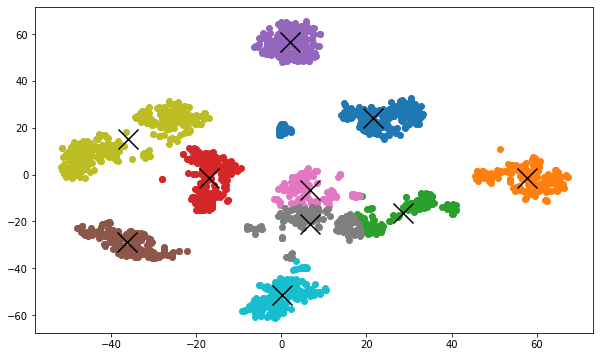

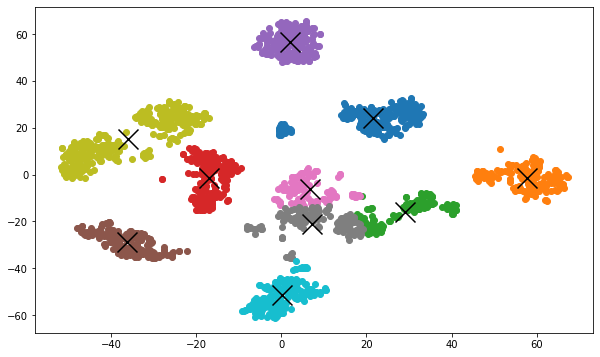

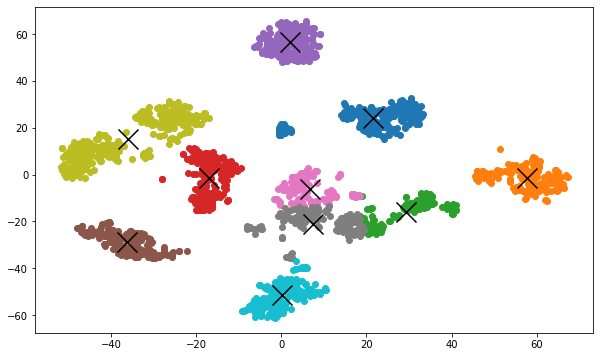

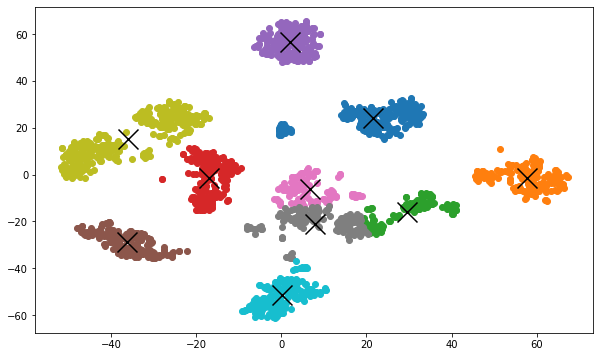

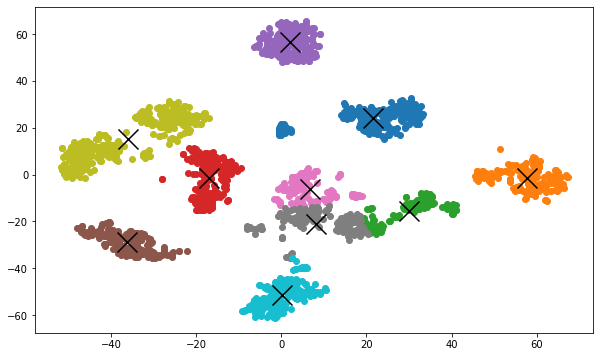

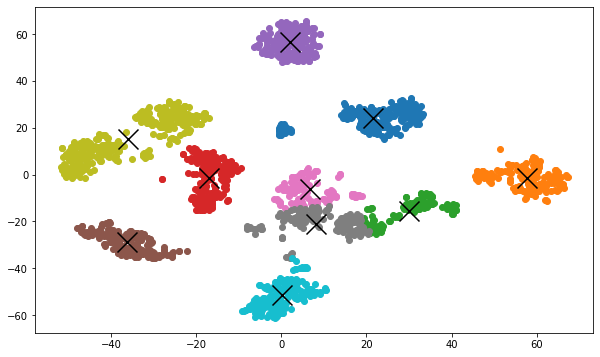

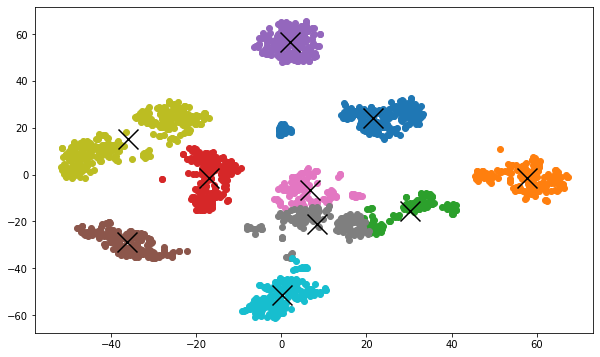

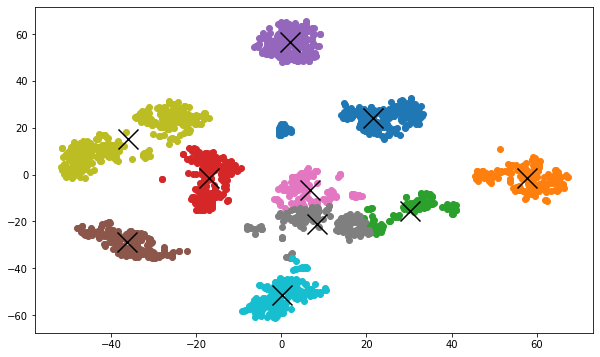

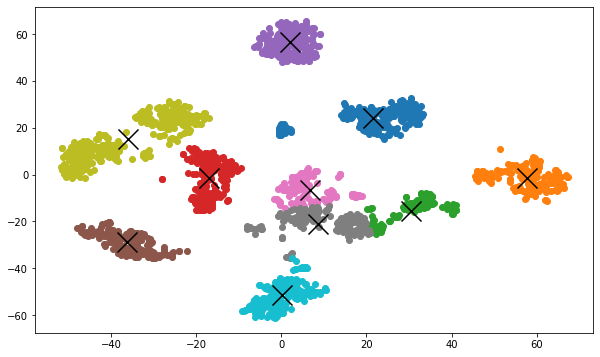

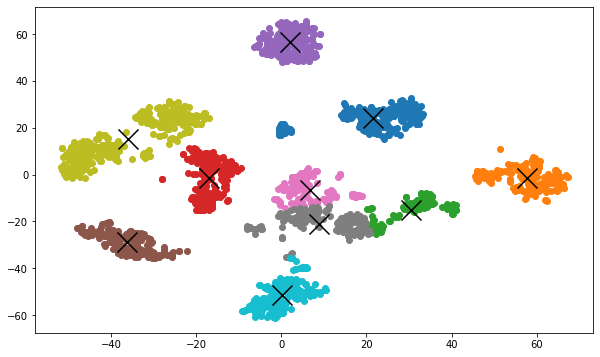

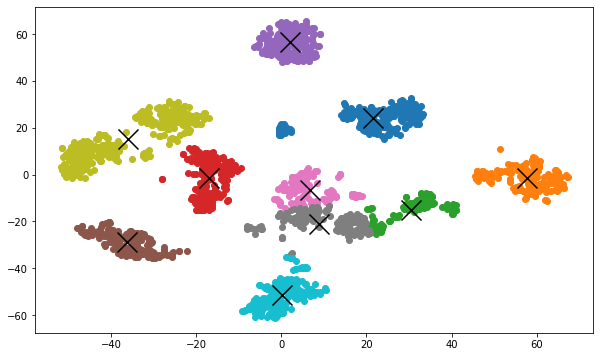

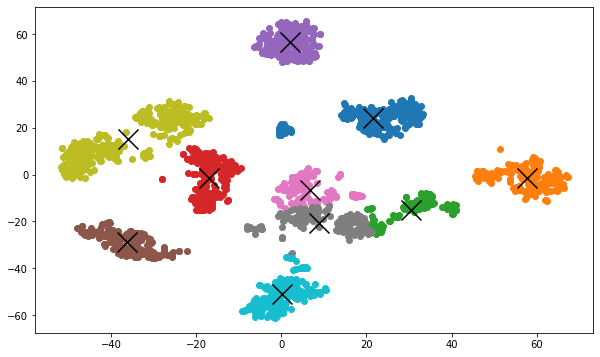

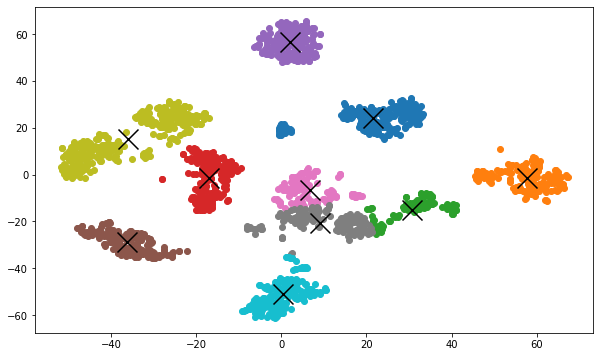

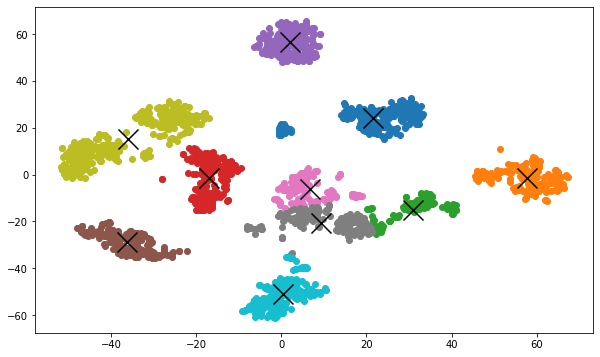

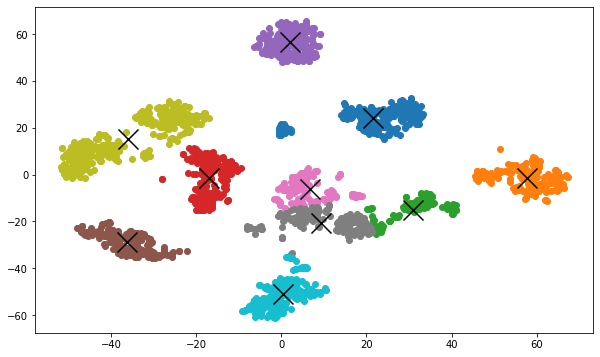

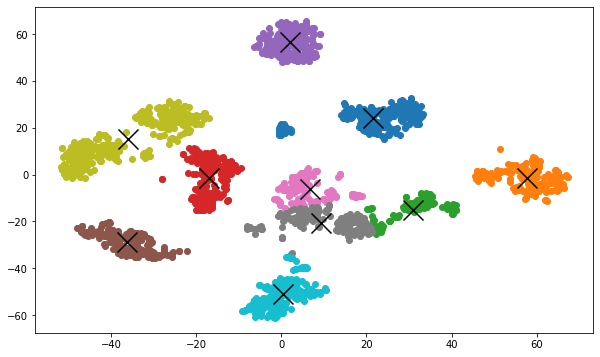

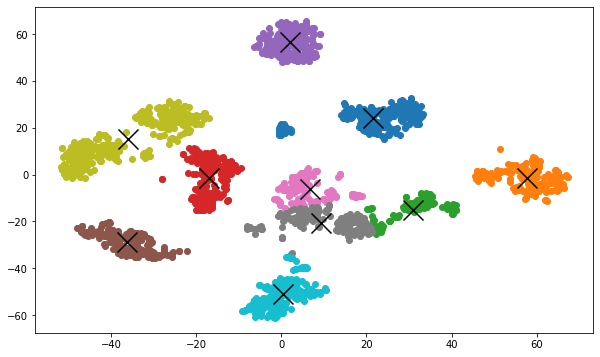

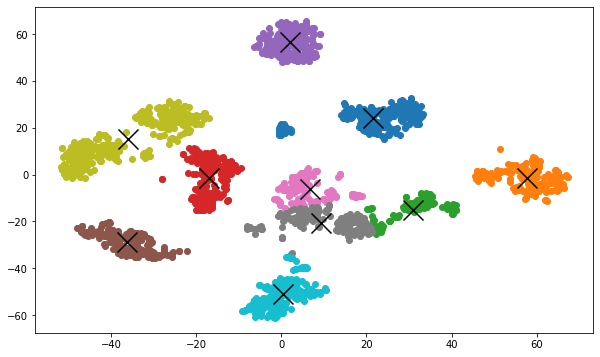

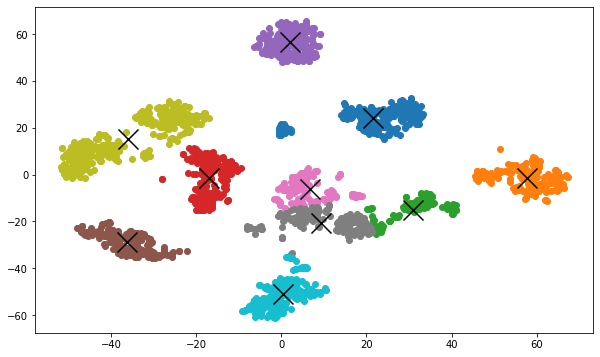

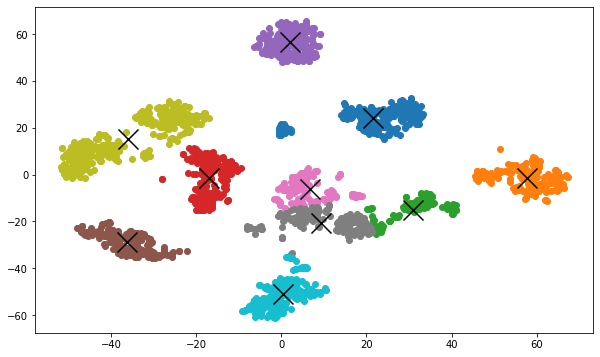

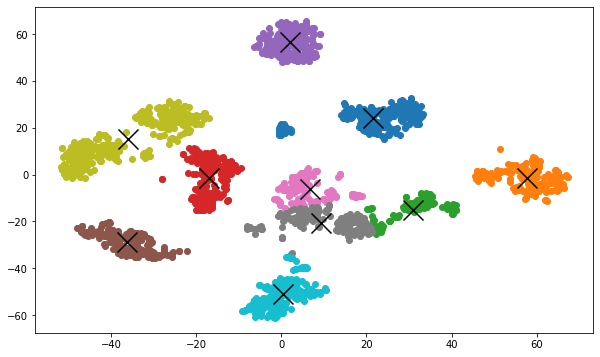

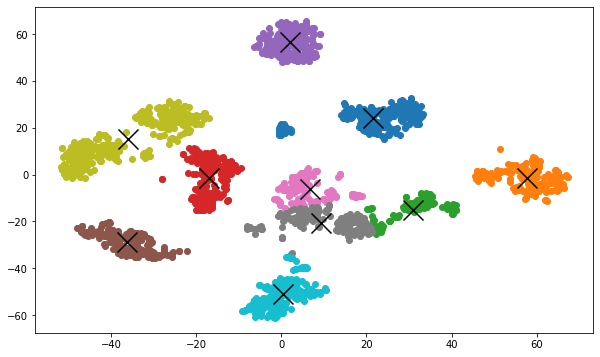

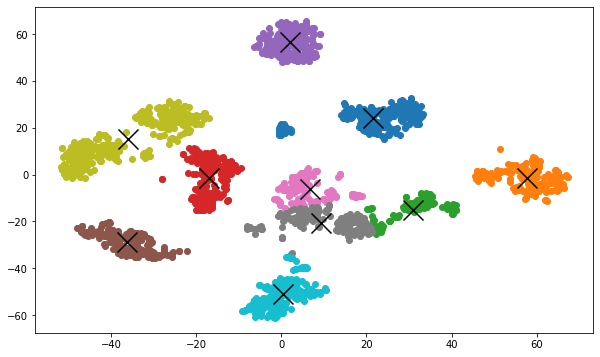

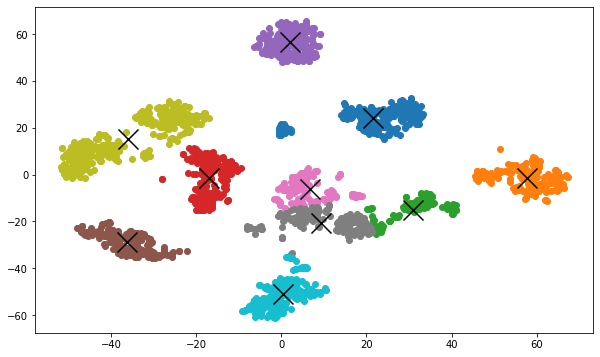

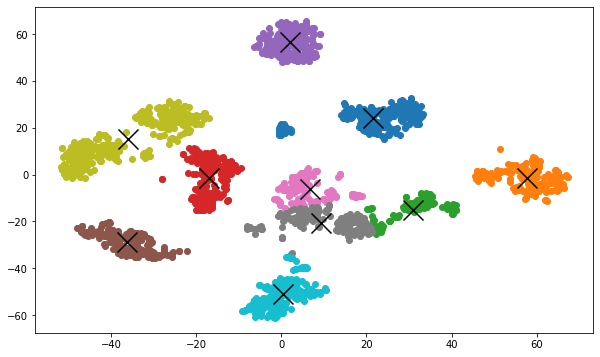

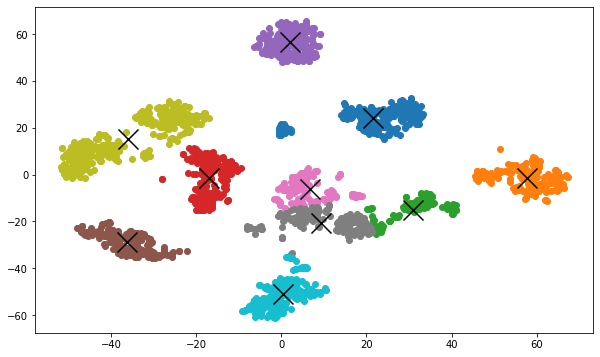

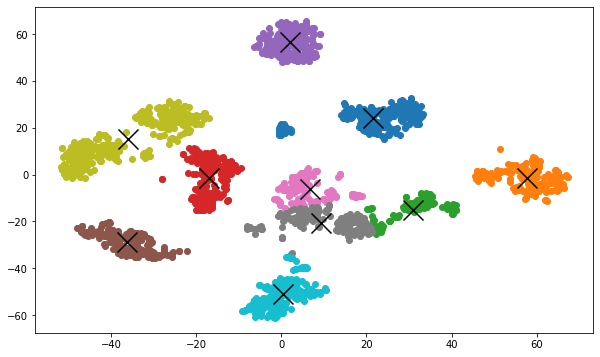

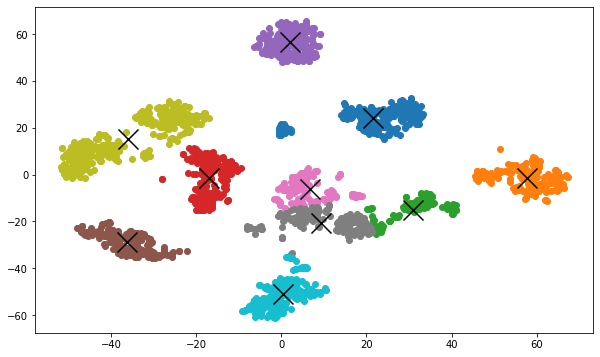

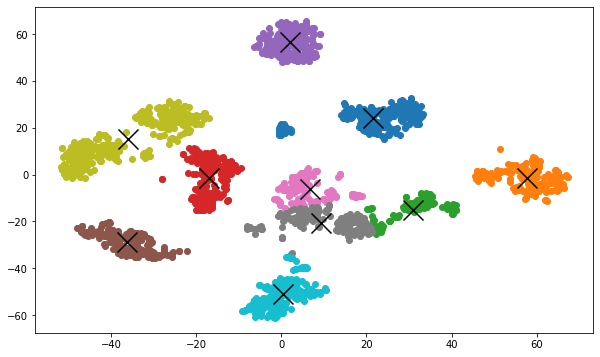

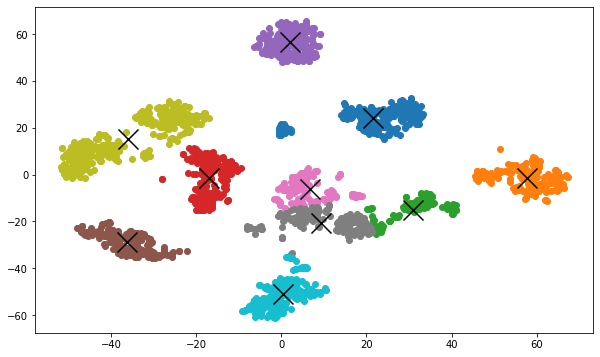

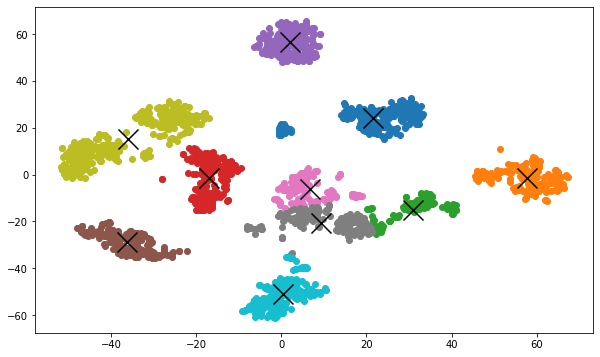

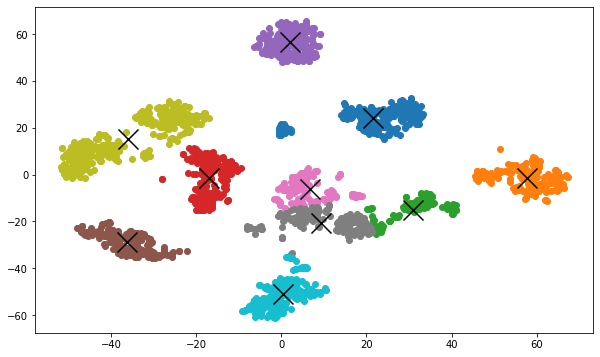

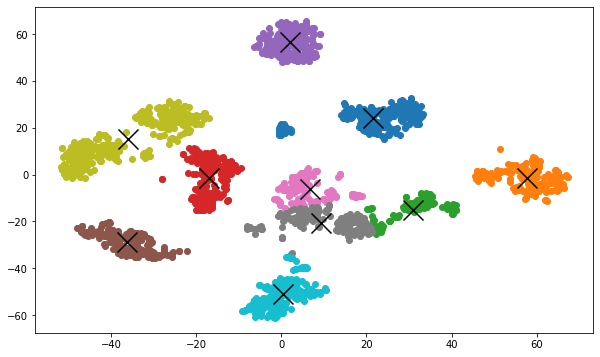

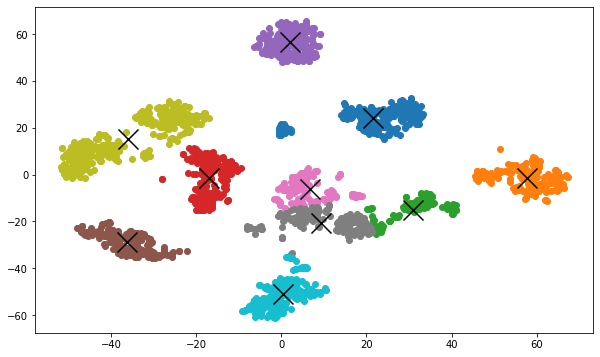

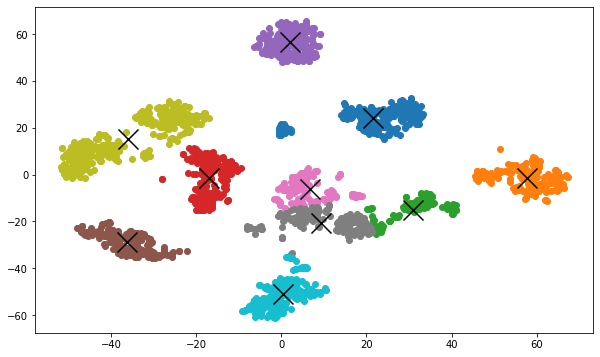

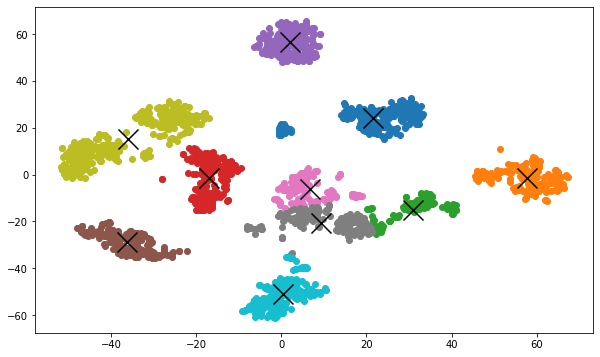

In [18]:
k = 10
centroides = {}
iteraciones = 50
contador = 1000
for i in range(k):
  centroides[i] = X[np.random.choice(len(X))]

for itera in range(iteraciones):
  #distancias

  distancias = {}

  for pos, datos in enumerate(X):
    distancias[pos] = []
    for pos_, centroide in centroides.items():
      distancias[pos].append(dista_euclidiana(datos, centroide))

  #asignar cada punto a un centroide por la mínima distancia

  puntos_centroides = {}

  for i in range(k):
    puntos_centroides[i] = []

  for pos_dato, distancias in distancias.items():
    puntos_centroides[distancias.index(min(distancias))].append(X[pos_dato])

  #nuevo centroide
  fig, ax = plt.subplots(1, 1, figsize=(10,6))
  for centroide, datos in centroides.items():
    ax.scatter(np.vstack(puntos_centroides[centroide])[:,0],np.vstack(puntos_centroides[centroide])[:,1])
    ax.scatter(datos[0],datos[1], marker='x', s=400, color='k')
  
  fig.savefig(f'imagen{contador}.png')
  plt.show()


  for centroide, datos in puntos_centroides.items():
    centroides[centroide] = np.average(np.vstack(datos), axis=0)

  contador += 1

  




In [19]:
import os
import re

In [20]:
os.listdir()

['.config',
 'imagen1036.png',
 'imagen1006.png',
 'imagen1032.png',
 'imagen1014.png',
 'imagen1017.png',
 'imagen1003.png',
 'imagen1030.png',
 'imagen1038.png',
 'imagen1025.png',
 'imagen1015.png',
 'imagen1047.png',
 'imagen1005.png',
 'imagen1013.png',
 'imagen1007.png',
 'imagen1037.png',
 'imagen1039.png',
 'imagen1026.png',
 'imagen1009.png',
 'imagen1020.png',
 'imagen1008.png',
 'imagen1031.png',
 'imagen1024.png',
 'imagen1029.png',
 'imagen1049.png',
 'imagen1004.png',
 'imagen1028.png',
 'imagen1012.png',
 'imagen1035.png',
 'imagen1019.png',
 'imagen1011.png',
 'imagen1046.png',
 'imagen1033.png',
 'imagen1021.png',
 'imagen1043.png',
 'imagen1041.png',
 'imagen1022.png',
 'imagen1023.png',
 'imagen1016.png',
 'imagen1018.png',
 'imagen1040.png',
 'imagen1042.png',
 'imagen1002.png',
 'imagen1000.png',
 'imagen1001.png',
 'imagen1044.png',
 'imagen1048.png',
 'imagen1027.png',
 'imagen1045.png',
 'imagen1010.png',
 'imagen1034.png',
 'sample_data']

In [21]:
reg = [re.findall('\w*\.png', i)[0] for i in os.listdir() if len(re.findall('\w*\.png', i))>0]

In [22]:
reg.sort()

In [23]:
reg

['imagen1000.png',
 'imagen1001.png',
 'imagen1002.png',
 'imagen1003.png',
 'imagen1004.png',
 'imagen1005.png',
 'imagen1006.png',
 'imagen1007.png',
 'imagen1008.png',
 'imagen1009.png',
 'imagen1010.png',
 'imagen1011.png',
 'imagen1012.png',
 'imagen1013.png',
 'imagen1014.png',
 'imagen1015.png',
 'imagen1016.png',
 'imagen1017.png',
 'imagen1018.png',
 'imagen1019.png',
 'imagen1020.png',
 'imagen1021.png',
 'imagen1022.png',
 'imagen1023.png',
 'imagen1024.png',
 'imagen1025.png',
 'imagen1026.png',
 'imagen1027.png',
 'imagen1028.png',
 'imagen1029.png',
 'imagen1030.png',
 'imagen1031.png',
 'imagen1032.png',
 'imagen1033.png',
 'imagen1034.png',
 'imagen1035.png',
 'imagen1036.png',
 'imagen1037.png',
 'imagen1038.png',
 'imagen1039.png',
 'imagen1040.png',
 'imagen1041.png',
 'imagen1042.png',
 'imagen1043.png',
 'imagen1044.png',
 'imagen1045.png',
 'imagen1046.png',
 'imagen1047.png',
 'imagen1048.png',
 'imagen1049.png']

In [28]:
import imageio
with imageio.get_writer('mygif.gif', mode='I', fps=2.5) as writer:
    for filename in reg:
        image = imageio.imread(filename)
        writer.append_data(image)